# Problématique 

# Prétraitement des données

In [105]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import PIL
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from PIL import Image
import cv2
import glob
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from PIL import Image

In [13]:
# une fonction qui nous permet de convertir une image à un tableau de pixel 
def img_to_array(img, data_format='channels_last', dtype='float32'):
    
    if data_format not in {'channels_first', 'channels_last'}:
        raise ValueError('Unknown data_format: %s' % data_format)
    # Numpy array x has format (height, width, channel)
    # or (channel, height, width)
    # but original PIL image has format (width, height, channel)
    x = np.asarray(img, dtype=dtype)
    if len(x.shape) == 3:
        if data_format == 'channels_first':
            x = x.transpose(2, 0, 1)
    elif len(x.shape) == 2:
        if data_format == 'channels_first':
            x = x.reshape((1, x.shape[0], x.shape[1]))
        else:
            x = x.reshape((x.shape[0], x.shape[1], 1))
    else:
        raise ValueError('Unsupported image shape: %s' % (x.shape,))
    return x


In [71]:
# initialisation des dimensions d'image
IMG_DIM=(224,224)

## Partie entrainement

In [2]:
#les nom de fichiers contenant dansla base d'entrainement 
files= os.listdir("C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/train/") 

In [4]:
#la liste des noms  des fichiers images chats 
cat_train = [fn for fn in files if 'cat' in fn]
#la liste des noms  des fichiers images chiens 
dog_train = [fn for fn in files if 'dog' in fn]


In [5]:
len(cat_train), len(dog_train)
# notre base d'entarinement se décompose de 11850 images d'un chien et 11850 images d'une chat 
# on peut conclure que notre base est équilibré 

(11850, 11850)

In [9]:
# on choisit pour l'entrainement 1000 images pour chaque catégorie(probléme de RAM) 
cat_train=cat_train[:1000]
dog_train=dog_train[:1000]

In [10]:
len(cat_train),len(dog_train)

(1000, 1000)

In [14]:
#concatiner les deux categories chat et chien  pour la base d'entrainement
train_files = np.concatenate([cat_train,dog_train]) # For technical issues we will only use 2000 images for each class
#concatiner les deux categories chat et chien  pour la base de validation
validation_files = np.concatenate([cat_val, dog_val])

In [15]:
#affichage du nom d'un fichier 
train_files[1]

'cat.1.jpg'

In [21]:
#convertir chaque image a un tableau de pixel 
train_imgs = [img_to_array(load_img('C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/train/'+img, target_size=IMG_DIM)) for img in train_files]

In [22]:
#convertir le dataset en array
train_imgs = np.array(train_imgs)

In [23]:
# le recodage des deux categories  1: chien 0: chat pour la partie d'entrainement 
filenames =list(train_files)
categories_train = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories_train.append(1)
    else:
        categories_train.append(0)


## Partie validation


In [11]:
#affecter les noms des fichiers des chats de la partie validation
files1= os.listdir("C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/valid/cat/")
cat_val = [fn for fn in files1 if 'cat' in fn]
#affecter les noms des fichiers des chiens de la partie validation
files2= os.listdir("C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/valid/dog/")
dog_val = [fn for fn in files2 if 'dog' in fn]

In [12]:
len(cat_val), len(dog_val)
# 100 images par categories 
#on a une base de validation equilibré 

(100, 100)

In [16]:
validation_files[1]

'cat.10118.jpg'

In [24]:
# convertir les images de la partie validation en tableau des pixel 
validation_imgs_cat = [img_to_array(load_img('C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/valid/cat/'+img, target_size=IMG_DIM)) for img in cat_val]
validation_imgs_cat = np.array(validation_imgs_cat)
validation_imgs_cat.shape
# donnee le code 0 pour chat
val_leb_cat=[0] * 100

In [25]:
# convertir une image de la categorie chient pour la partie validation
validation_imgs_dog = [img_to_array(load_img('C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/valid/dog/'+img, target_size=IMG_DIM)) for img in dog_val]
validation_imgs_dog = np.array(validation_imgs_dog)
validation_imgs_dog.shape
#donner la valeur 1 pour la  catégorie chien 
val_leb_dog=[1] * 100

In [27]:
#concatiner les deux categories chat et chien pour avoir une base complete de validation pour le modéle 
validation_imgs = np.concatenate((validation_imgs_cat, validation_imgs_dog))
validation_imgs.shape

(200, 224, 224, 3)

In [29]:
#concatinerla partie labelisaton les deux categories chat et chien pour avoir une base complete de validation pour le modéle
validation_leb = np.concatenate((val_leb_cat, val_leb_dog))

## Partie évaluation

In [74]:
#affecter les noms des fichiers des chats de la partie validation
files1_t= os.listdir("C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/test/cat/")
cat_test = [fn for fn in files1_t if 'cat' in fn]
#affecter les noms des fichiers des chiens de la partie validation
files2_t= os.listdir("C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/test/dog/")
dog_test = [fn for fn in files2_t if 'dog' in fn]

In [75]:
len(cat_test), len(dog_test)

(50, 50)

In [77]:
# convertir les images de la partie validation en tableau des pixel 
testing_imgs_cat = [img_to_array(load_img('C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/test/cat/'+img, target_size=IMG_DIM)) for img in cat_test]
testing_imgs_cat = np.array(testing_imgs_cat)
testing_imgs_cat.shape
# donnee le code 0 pour chat
test_leb_cat=[0] * 50

In [78]:
# convertir une image de la categorie chient pour la partie validation
testing_imgs_dog = [img_to_array(load_img('C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/test/dog/'+img, target_size=IMG_DIM)) for img in dog_test]
testing_imgs_dog = np.array(testing_imgs_dog)
testing_imgs_dog.shape
#donner la valeur 1 pour la  catégorie chien 
test_leb_dog=[1] * 50

In [80]:
#concatiner les deux categories chat et chien pour avoir une base complete de validation pour le modéle 
testing_imgs = np.concatenate((testing_imgs_cat, testing_imgs_dog))
testing_imgs.shape

(100, 224, 224, 3)

In [84]:
#concatinerla partie labelisaton les deux categories chat et chien pour avoir une base complete de validation pour le modéle
testing_leb = np.concatenate((test_leb_cat, test_leb_dog))

In [85]:
print('Train dataset shape:', train_imgs.shape, 
      '\nValidation dataset shape:', validation_imgs.shape,
       '\n testing dataset shape :', testing_imgs.shape)

Train dataset shape: (2000, 224, 224, 3) 
Validation dataset shape: (200, 224, 224, 3) 
 testing dataset shape : (100, 224, 224, 3)


In [86]:
train_set = ImageDataGenerator(rescale=1./255).flow(train_imgs, categories_train, batch_size=30)

val_set = ImageDataGenerator(rescale=1./255).flow(validation_imgs, validation_leb, batch_size=20)


# Modelisation

In [53]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [56]:
from tensorflow.keras.optimizers import SGD

In [57]:
model = define_model()

C:\Users\khaou\anaconda3\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [59]:
history = model.fit_generator(train_set , steps_per_epoch=len(train_set),validation_data=val_set, validation_steps=len(val_set), epochs=20, verbose=1)

C:\Users\khaou\AppData\Local\Temp/ipykernel_1956/150945128.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_set , steps_per_epoch=len(train_set),validation_data=val_set, validation_steps=len(val_set), epochs=20, verbose=1)


Epoch 1/20
67/67 [==============================] - 40s 601ms/step - loss: 0.6150 - accuracy: 0.6595 - val_loss: 0.6393 - val_accuracy: 0.6050
Epoch 2/20
67/67 [==============================] - 41s 611ms/step - loss: 0.6088 - accuracy: 0.6510 - val_loss: 0.7001 - val_accuracy: 0.5800
Epoch 3/20
67/67 [==============================] - 40s 601ms/step - loss: 0.5927 - accuracy: 0.6820 - val_loss: 0.6790 - val_accuracy: 0.6200
Epoch 4/20
67/67 [==============================] - 41s 607ms/step - loss: 0.5662 - accuracy: 0.6935 - val_loss: 0.6602 - val_accuracy: 0.6050
Epoch 5/20
67/67 [==============================] - 43s 641ms/step - loss: 0.5743 - accuracy: 0.6840 - val_loss: 0.6049 - val_accuracy: 0.6000
Epoch 6/20
67/67 [==============================] - 41s 618ms/step - loss: 0.5413 - accuracy: 0.7295 - val_loss: 0.6670 - val_accuracy: 0.6150
Epoch 7/20
67/67 [==============================] - 38s 569ms/step - loss: 0.5330 - accuracy: 0.7320 - val_loss: 0.6286 - val_accuracy: 0.6400

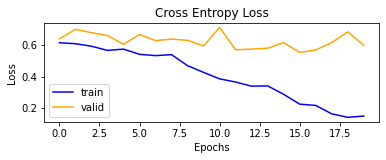

In [70]:
# plot loss
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])

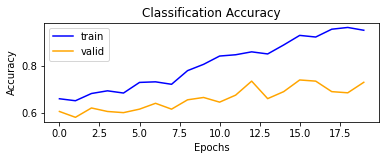

In [69]:
# plot accuracy
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='valid')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'valid'])

# Evaluation

In [90]:
# evaluate model
_, acc = model.evaluate_generator(val_set, steps=len(val_set), verbose=0)
print(' test acc: %.3f' % (acc * 100.0))

C:\Users\khaou\AppData\Local\Temp/ipykernel_1956/2536284112.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  _, acc = model.evaluate_generator(val_set, steps=len(val_set), verbose=0)


 test acc: 73.000


# Prediction

In [96]:
# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    img = img - [123.68, 116.779, 103.939]
    return img

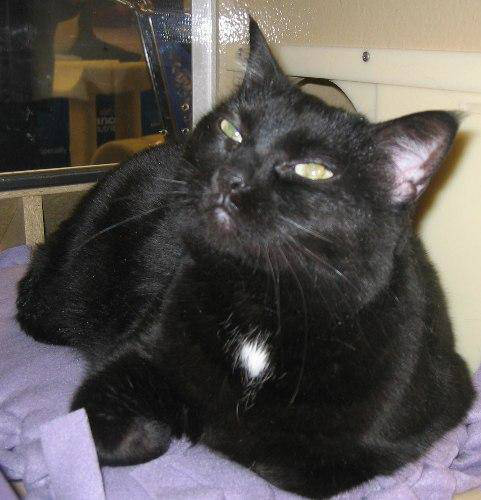

In [110]:
# load an image and predict the class
path='C:/Users/khaou/Downloads/dogs-vs-cats1/dogs-vs-cats/test/cat/cat.345.jpg'
img1 = PIL.Image.open(path)
   
img1

In [113]:
img = load_image(path)
result = model.predict(img)
if result[0]==0 :
    
    print('c'est une chat')
else :
     
    print('c est un chien')


cest une chat
